In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import time

from image_data_helpers import get_data
 

In [11]:
start = time.perf_counter()
_, test = get_data((300, 60), resolution=64, square=True)
end = time.perf_counter()
print(f'data loaded in {round(end-start, 2)} seconds')
print(test.shape)

data loaded in 4.38 seconds
(1, 5, 64, 64)


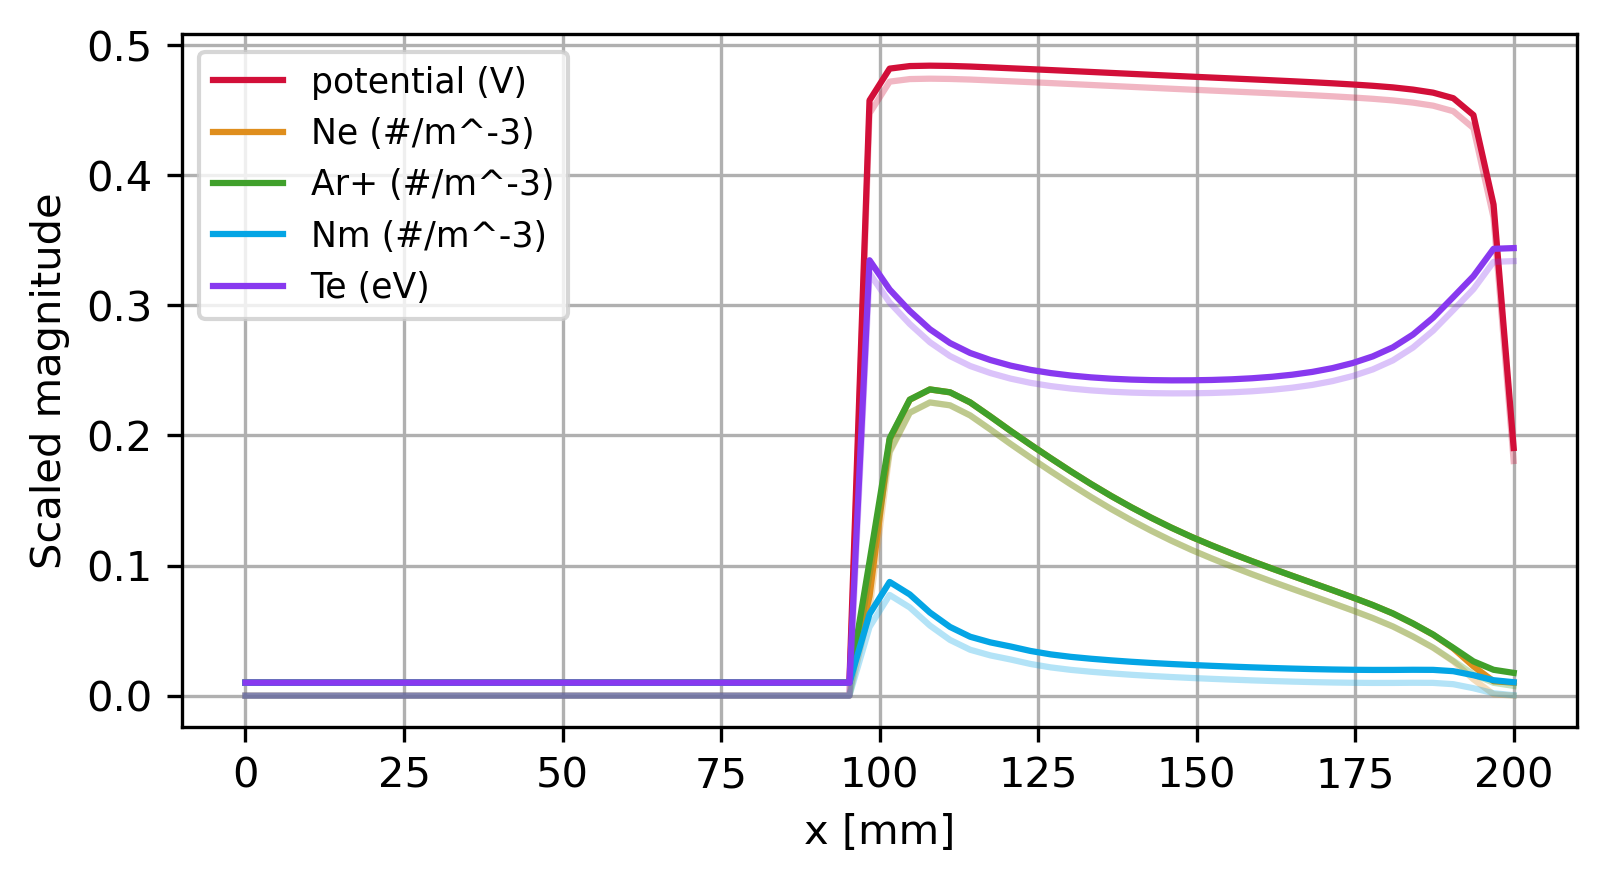

In [6]:
%matplotlib inline
columns = ['potential (V)', 'Ne (#/m^-3)', 'Ar+ (#/m^-3)', 'Nm (#/m^-3)', 'Te (eV)']
colors = ['#d20f39', '#df8e1d', '#40a02b', '#04a5e5', '#8839ef']
fig, ax = plt.subplots(figsize=(6,3), dpi=300)

# horizontal (fixed y = 44 mm)
for i, column in enumerate(columns):
    reference = test[0, i, 20]
    prediction = test[0, i, 20] + 0.01 # change this

    x = np.linspace(0, 200, 64)

    ax.plot(x, prediction, color=colors[i], label=column)
    ax.plot(x, reference, color=colors[i], alpha=0.3)
    ax.grid()
    ax.legend(fontsize='small')
    ax.set_ylabel('Scaled magnitude')
    ax.set_xlabel('x [mm]')

plt.show()

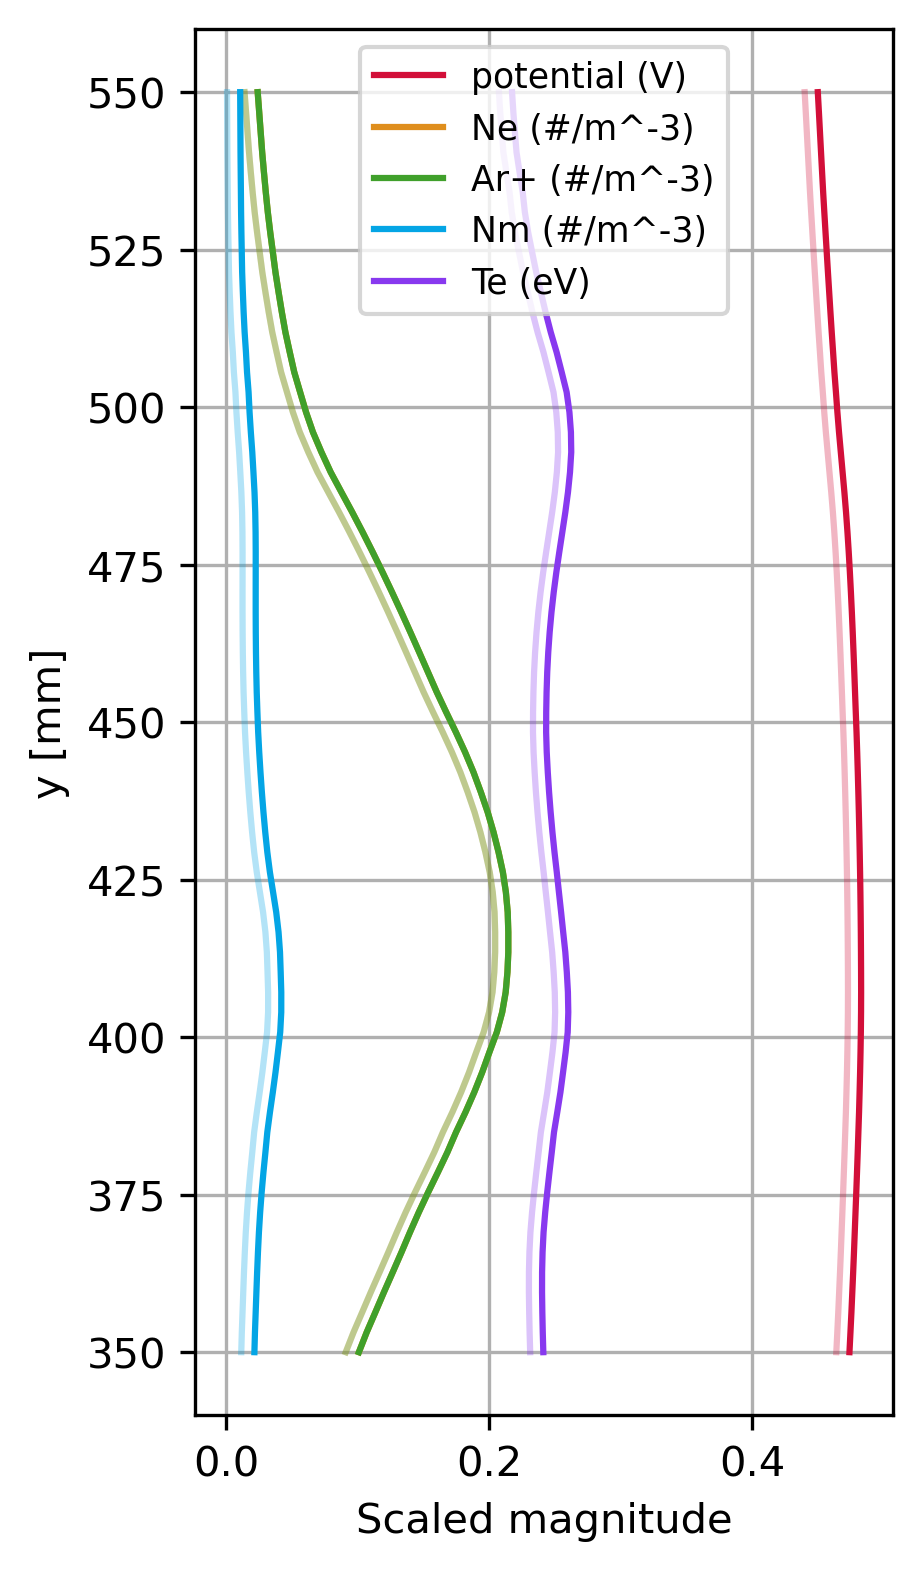

In [7]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(3, 6), dpi=300)
# vertical (fixed x = 115 mm)
for i, column in enumerate(columns):
    reference = test[0, i, :, 37]
    prediction = test[0, i, :, 37] + 0.01 # change this

    y = np.linspace(350, 550, 64)

    ax.plot(prediction, y, color=colors[i], label=column)
    ax.plot(reference, y, color=colors[i], alpha=0.3)
    ax.grid()
    ax.legend(fontsize='small')
    ax.set_xlabel('Scaled magnitude')
    ax.set_ylabel('y [mm]')

plt.show()

execution flow
1. function takes two arguments (reference, prediction) which are each 5 channel images
2. using these images, the function returns a vertical plot
3. and a horizontal plot

following the code above

In [8]:
test.shape[2]

64